In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import astropy.table as table
from scipy.io.idl import readsav
import scipy.signal as signal
import pandas as pd

In [14]:
# load lightcurve
#lc = pd.read_hdf('../products/lc_interpolated_per_ins.h5')
lc = table.Table.read('../data/ztflc_forcefit.h5')
lc['mag'] = -2.5*np.log10(lc['ampl']) + lc['magzp']
lc['mag_err'] = 1.087 * lc['ampl.err'] / lc['ampl']
lc.sort('obsmjd')
lc

<ipython-input-14-7614b1b91bb4>:4: RuntimeWarning: invalid value encountered in log10
  lc['mag'] = -2.5*np.log10(lc['ampl']) + lc['magzp']


<Table length=233>
      sigma             sigma.err      ...       mag_err      
     float64             float64       ...       float64      
------------------ ------------------- ... -------------------
 5.084136052596823 0.14598030314058213 ... -1.1712101230710077
 4.429017756876249 0.13089623320578814 ...  0.9997859988451724
7.5097771045959565 0.21343025115356465 ... -0.7776537551201603
 4.312240386808786 0.11895011491891837 ...  2.4861661991507145
 6.920073204906437 0.20183763719483674 ...  2.1623544353650574
 4.847475113950799 0.14199017641917233 ... 0.41496133116133765
 8.468640852051923 0.23663097108285228 ...  1.3318850213460678
5.7556202461528025 0.16507011574947664 ... -2.2324859138537545
10.685178556147084 0.11571123951332839 ... -13.773651344145174
12.701894355627289  0.3536305646637821 ...     4.6509427507565
               ...                 ... ...                 ...
11.756126965829814 0.33270753646618856 ...  0.5816132828020777
10.508604769883636  0.2980412226697699 ...  0.9477318119046192
13.380180036161295 0.37292168647668056 ...  1.2787181286547737
15.854730822439397 0.46644715869210285 ...  3.3656720295101263
 13.60963241181266 0.38560315389397826 ...  0.5905187876160396
 11.16743042466407  0.3051480017291456 ...  0.6548618803995663
 7.608362038731256 0.21204732924074718 ...  0.4090114554731345
 5.380505973919246  0.1545084515835955 ...  0.2663235515754014
 4.823029789358324 0.13353517841322923 ...  0.5176271689312635
 4.998202581685263 0.13419440737214583 ...  0.2202539803016794

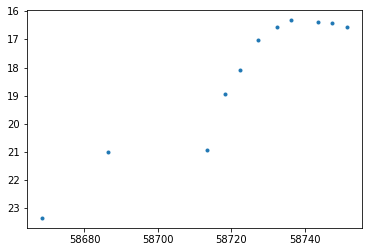

In [26]:
idx = lc['filter'] == 'ZTF_i'
#plt.plot(lc.index, lc['mag_"g"_ZTF'])
plt.plot(lc['obsmjd'][idx], lc['mag'][idx], ls='', marker='.')
plt.gca().invert_yaxis()

In [27]:
idx = np.logical_and(lc['filter'] == 'ZTF_i', lc['mag_err'] > 0)
sublc = lc[idx]
peak_val = sublc['mag'].min()
peak_idx = sublc['mag'].argmin()
peak_err = sublc['mag_err'][peak_idx]
print(peak_val, peak_idx, peak_err, sublc['obsmjd'][peak_idx])
idx2 = np.logical_and(idx, lc['mag']-2*lc['mag_err'] < peak_val + 2*peak_err)
print(lc[idx2]['mag', 'mag_err', 'obsmjd'])
min_mjd = lc[idx2]['obsmjd'].min()
max_mjd = lc[idx2]['obsmjd'].max()
print('Min MJD: %f' % min_mjd)
print('Max MJD: %f' % max_mjd)
#peak_val = lc['mag_"g"_ZTF'].min()
#peak_idx = lc['mag_"g"_ZTF'].argmin()
#peak_err = lc['magerr_"g"_ZTF'].iloc[peak_idx]
#idx = lc['mag_"g"_ZTF']-2*lc['magerr_"g"_ZTF'] < peak_val + 2*peak_err
#np.count_nonzero(idx)
#print(lc.index[idx])
#print(lc.index[peak_idx])

16.32224701631279 7 0.006327842576688323 58736.333588
       mag               mag_err            obsmjd   
------------------ -------------------- -------------
 16.32224701631279 0.006327842576688323  58736.333588
16.370340569733205  0.02401470563580083 58743.4756944
Min MJD: 58736.333588
Max MJD: 58743.475694


In [24]:
(58736-58731)/2

2.5

In [ ]:
# 2021-08-06
